## Setup

### imports

In [1]:
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

### definitions

In [3]:
path_data_dir = '../data/'

In [4]:
list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

In [5]:
relevant_cols = ['Date', 'Close', 'Volume']

## Data 

In [6]:
dict_dfs = {}
for asset in list_assets:

    df = pd.read_csv(path_data_dir + f"processed/price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0)
    
    dict_dfs.update({asset:df})

In [7]:
dict_dfs

{'PETR3.SA':                 Close      Volume     SMA_21   MSTD_21  Day_of_week  Weekend  \
 Date                                                                           
 2010-12-22  28.490000   3146900.0  28.108095  0.450062            2        0   
 2010-12-23  28.540001   2006300.0  28.139524  0.456338            3        0   
 2010-12-24  28.540001   2006300.0  28.139524  0.456338            4        0   
 2010-12-25  28.540001   2006300.0  28.139524  0.456338            5        1   
 2010-12-26  28.540001   2006300.0  28.139524  0.456338            6        1   
 ...               ...         ...        ...       ...          ...      ...   
 2024-02-25  43.619999  13303800.0  42.770000  1.167981            6        1   
 2024-02-26  44.080002   6699800.0  43.000476  0.878160            0        0   
 2024-02-27  43.970001   8188500.0  43.139048  0.780852            1        0   
 2024-02-28  41.599998  17368700.0  43.121905  0.811385            2        0   
 2024-02-29  41.

In [8]:
"petra.SA"

'petra.SA'

In [9]:
def create_joint_df(dict_dfs, col):
    
    df_final = pd.DataFrame({})

    for asset, df in dict_dfs.items():
            
        df_rel = df[col].reset_index()
        
        df_rel.rename({col: asset.replace(".SA", "")},axis= 1, inplace = True)
        
        
        if len(df_final) == 0:
            
            df_final = df_rel
        else:
        
            df_final = df_final.merge(
                df_rel,
                on = 'Date',
                how = 'left'
            )
            
    return df_final    

In [10]:
df_dp = create_joint_df(dict_dfs, 'diff_close_mean_z_score')
df_dp

,Date,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
0,2010-12-22,0.848559,0.539196,0.739989,1.109263,-1.107384,0.694253,1.166778,-0.075831
1,2010-12-23,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2,2010-12-24,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
3,2010-12-25,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
4,2010-12-26,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
...,...,...,...,...,...,...,...,...,...
4813,2024-02-25,0.727751,0.920320,0.115310,0.105989,0.770039,0.697232,-1.400571,1.301530
4814,2024-02-26,1.229304,0.900798,-1.056026,-0.386233,0.701608,0.596515,-1.140905,1.897895
4815,2024-02-27,1.064163,0.574021,0.407318,0.751218,1.110699,0.898616,0.467179,1.740712
4816,2024-02-28,-1.875689,0.022168,-0.119912,1.114645,-0.416942,0.962232,-0.632555,1.702107


In [11]:
df_dp_int = df_dp.copy()
for asset in list_assets:
    
    df_dp_int[asset.replace(".SA", "")] = df_dp_int[asset.replace(".SA", "")].apply(int)
df_dp_int

,Date,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
0,2010-12-22,0,0,0,1,-1,0,1,0
1,2010-12-23,0,0,0,0,0,0,1,0
2,2010-12-24,0,0,0,0,0,0,1,0
3,2010-12-25,0,0,0,0,0,0,1,0
4,2010-12-26,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4813,2024-02-25,0,0,0,0,0,0,-1,1
4814,2024-02-26,1,0,-1,0,0,0,-1,1
4815,2024-02-27,1,0,0,0,1,0,0,1
4816,2024-02-28,-1,0,0,1,0,0,0,1


In [12]:
df_close = create_joint_df(dict_dfs, 'Close')
df_close

,Date,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
0,2010-12-22,28.490000,31.500999,57.029999,13.730158,10.323810,14.115611,11.843924,2.778846
1,2010-12-23,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2,2010-12-24,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
3,2010-12-25,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
4,2010-12-26,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
...,...,...,...,...,...,...,...,...,...
4813,2024-02-25,43.619999,45.799999,67.379997,16.666666,24.520000,29.650000,15.720000,26.180000
4814,2024-02-26,44.080002,45.860001,65.750000,16.541666,24.520000,29.620001,15.780000,26.600000
4815,2024-02-27,43.970001,45.400002,67.480003,16.758333,24.830000,30.000000,16.240000,26.610001
4816,2024-02-28,41.599998,44.500000,66.739998,16.833332,23.969999,30.150000,15.910000,26.670000


## Analysis

### close price

In [13]:
df_close.describe()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,22.618674,11.157565,48.432856,11.353694,13.408565,20.773434,16.047387,13.127656
std,8.153836,13.791994,23.840936,4.747664,4.298179,5.798589,6.759396,8.446298
min,5.910000,0.138000,8.600000,1.968253,6.078577,9.931015,6.318017,1.944230
25%,16.070000,0.936500,31.230000,8.492063,9.278596,15.448484,10.089967,4.307692
50%,22.304999,3.799000,43.945000,10.472221,13.833542,20.920000,15.257540,12.595191
75%,29.207500,19.247500,62.680000,14.720238,16.923265,25.133333,22.131920,21.586538
max,44.490002,50.200001,118.720001,24.595238,25.000000,33.430000,31.590086,29.600000


<Axes: >

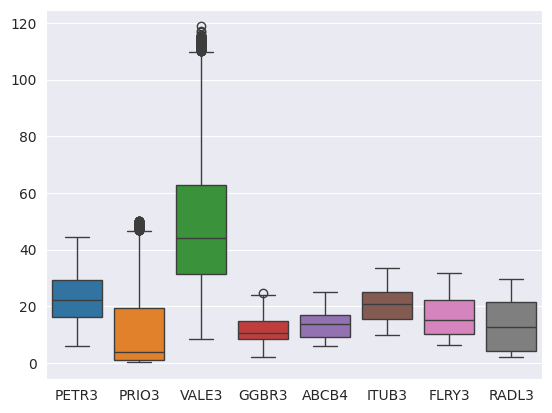

In [14]:
sns.boxplot(data=df_close)

#### correlation

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.752591,0.764820,0.771377,0.654440,0.484722,0.329394,0.579472
PRIO3,0.752591,1.000000,0.683914,0.770788,0.407234,0.088885,0.003453,0.503017
VALE3,0.764820,0.683914,1.000000,0.917264,0.548766,0.453675,0.428262,0.708499
GGBR3,0.771377,0.770788,0.917264,1.000000,0.514714,0.306139,0.280163,0.628838
ABCB4,0.654440,0.407234,0.548766,0.514714,1.000000,0.857087,0.705357,0.812616
ITUB3,0.484722,0.088885,0.453675,0.306139,0.857087,1.000000,0.799866,0.729831
FLRY3,0.329394,0.003453,0.428262,0.280163,0.705357,0.799866,1.000000,0.666377
RADL3,0.579472,0.503017,0.708499,0.628838,0.812616,0.729831,0.666377,1.000000


None


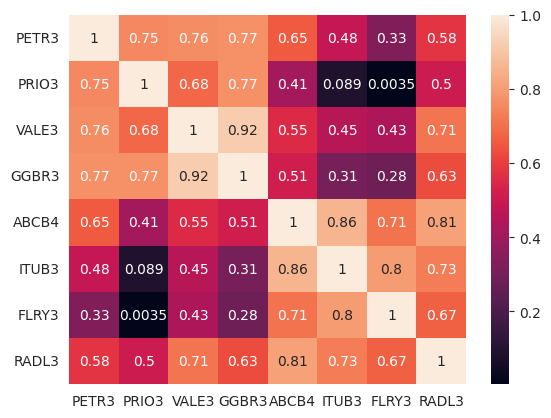

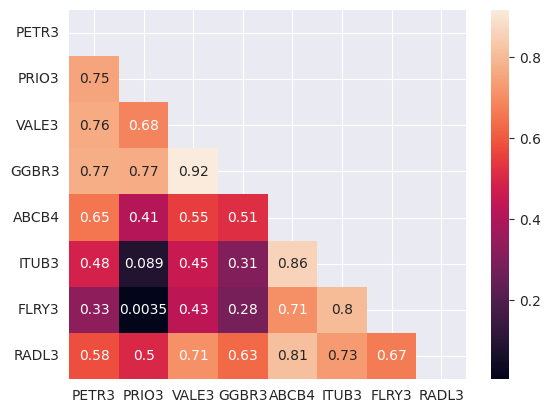

In [15]:
# close correlation
corr_mtrx_close = df_close.drop('Date', axis = 1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

### moving std and meta 

In [16]:
df_dp.describe()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,0.072853,0.082749,0.012275,0.032309,0.085402,0.120431,-0.010396,0.186332
std,1.316939,1.353250,1.294722,1.297827,1.307334,1.313760,1.285413,1.288326
min,-3.901364,-3.483726,-3.628286,-3.581146,-3.283496,-3.563854,-3.724003,-3.522259
25%,-1.027328,-1.012037,-1.035961,-1.029149,-0.996601,-0.986374,-1.045334,-0.856735
50%,0.067887,0.081516,-0.002204,0.031756,0.086235,0.239954,-0.050400,0.324774
75%,1.161929,1.149161,1.034024,1.107855,1.136012,1.210616,1.015183,1.239388
max,3.872128,4.149822,3.722931,3.739784,3.494172,3.648107,3.613129,3.534116


<Axes: >

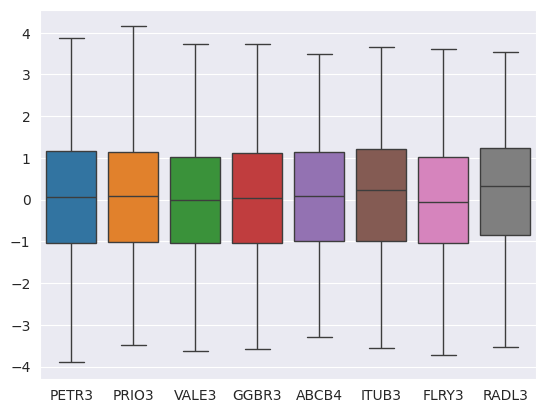

In [17]:
sns.boxplot(data=df_dp)

<Axes: >

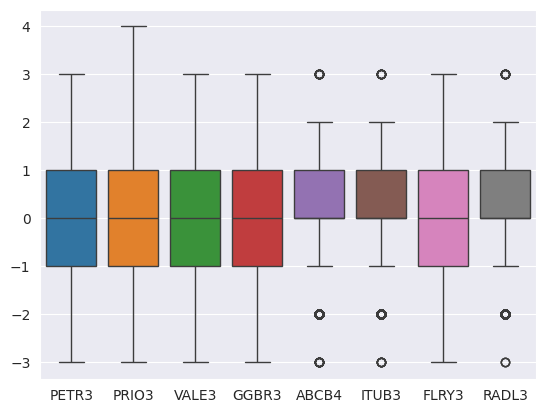

In [18]:
sns.boxplot(data=df_dp_int)

#### Correlation

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.299106,0.363926,0.382302,0.332698,0.499145,0.185479,0.117924
PRIO3,0.299106,1.000000,0.300556,0.237050,0.177052,0.130420,0.122142,0.040903
VALE3,0.363926,0.300556,1.000000,0.582309,0.171576,0.241367,0.125103,0.096279
GGBR3,0.382302,0.237050,0.582309,1.000000,0.334522,0.368253,0.231238,0.104298
ABCB4,0.332698,0.177052,0.171576,0.334522,1.000000,0.585860,0.246072,0.197841
ITUB3,0.499145,0.130420,0.241367,0.368253,0.585860,1.000000,0.275842,0.254245
FLRY3,0.185479,0.122142,0.125103,0.231238,0.246072,0.275842,1.000000,0.315681
RADL3,0.117924,0.040903,0.096279,0.104298,0.197841,0.254245,0.315681,1.000000


None


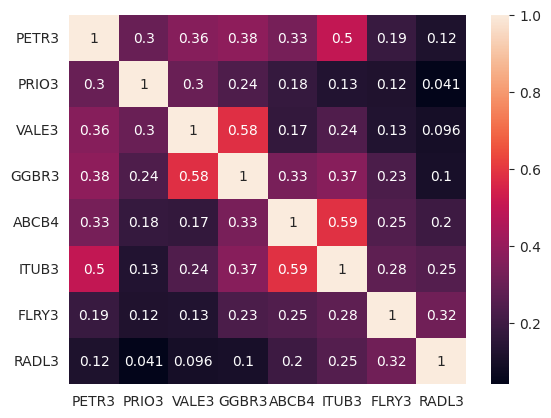

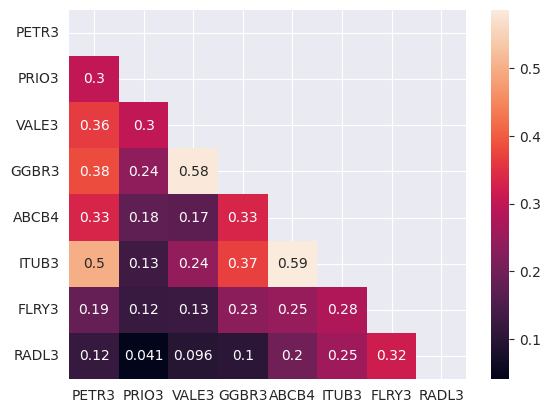

In [19]:
# close correlation
corr_mtrx_close = df_dp.drop('Date', axis = 1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.260304,0.351932,0.353726,0.305461,0.438089,0.139752,0.099578
PRIO3,0.260304,1.000000,0.263890,0.206149,0.165148,0.104624,0.113648,0.036439
VALE3,0.351932,0.263890,1.000000,0.512874,0.153458,0.231264,0.105365,0.082681
GGBR3,0.353726,0.206149,0.512874,1.000000,0.280893,0.319977,0.184441,0.093203
ABCB4,0.305461,0.165148,0.153458,0.280893,1.000000,0.514242,0.240507,0.182399
ITUB3,0.438089,0.104624,0.231264,0.319977,0.514242,1.000000,0.224272,0.216534
FLRY3,0.139752,0.113648,0.105365,0.184441,0.240507,0.224272,1.000000,0.274161
RADL3,0.099578,0.036439,0.082681,0.093203,0.182399,0.216534,0.274161,1.000000


None


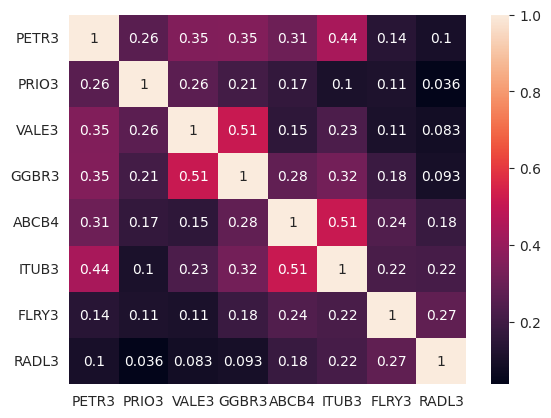

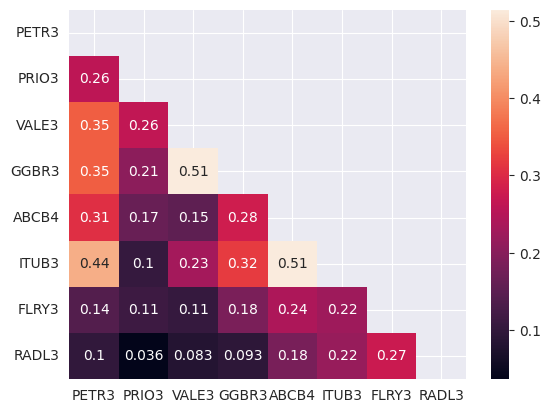

In [20]:
# close correlation
corr_mtrx_close = df_dp_int.drop('Date', axis = 1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

#### Decompose

In [21]:
!pip install statsmodels

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df_dp.Date = pd.to_datetime(df_dp.Date)

In [24]:
df_dp[['Date','PETR3.SA']].set_index('Date')

KeyError: "['PETR3.SA'] not in index"

In [ ]:
df_dp.dtypes

In [ ]:
for asset in list_assets:

    print(asset)
    # Executando a decomposição
    decomposition = seasonal_decompose(
        df_dp[['Date',asset]].set_index('Date'), 
        model='additive', 
        period=12
        )  # Ajuste o período conforme necessário

    # Plotando os resultados
    plt.rcParams.update({'figure.figsize': (10, 10)})
    decomposition.plot()
    plt.show()

### ff

In [ ]:


# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers', name='markers'))

fig.show()

In [ ]:
dict_dfs[asset_list[0]].index

In [ ]:
for asset_list in [["PETR3.SA","PRIO3.SA"],
["VALE3.SA", "GGBR3.SA"],
["ABCB4.SA", "ITUB3.SA"],
["FLRY3.SA", "RADL3.SA"]]:
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dict_dfs[asset_list[0]].index, y=dict_dfs[asset_list[0]]['diff_close_mean_z_score'],
                        mode='lines',
                        name=asset_list[0]))
    fig.add_trace(go.Scatter(x=dict_dfs[asset_list[1]].index, y=dict_dfs[asset_list[1]]['diff_close_mean_z_score'],
                        mode='lines',
                        name=asset_list[1]))

    fig.show()

